In [1]:
import http.client
import json
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime

In [4]:
#if data is in a csv file then jump to 47th cell
#otherwise, jump to 1st cell
#read data from csv file if it exists


if os.path.isfile('monks.csv'):
    df = pd.read_csv('monks.csv')
    print(df)
else:
    df=pd.DataFrame()


          id  sport_id  league_id  season_id  stage_id  group_id  \
0        469         1          8          6         4       NaN   
1        486         1          8          6         4       NaN   
2        471         1          8          6         4       NaN   
3        482         1          8          6         4       NaN   
4        474         1          8          6         4       NaN   
..       ...       ...        ...        ...       ...       ...   
71  18220129         1        384      18576  77454372       NaN   
72  18220123         1        384      18576  77454372       NaN   
73  18220128         1        384      18576  77454372       NaN   
74  18220124         1        384      18576  77454372       NaN   
75  18220120         1        384      18576  77454372       NaN   

    aggregate_id  round_id  state_id  venue_id  ...  \
0            NaN        45         5     204.0  ...   
1            NaN        45         5     383.0  ...   
2            NaN  

In [21]:

''' 
    AutToken='NFKDUEzEPM3LcVc57jl4RD3xmflyJEoTXSfKlSqc42XzTHcBiwYqKnDflK5O'

    request=requests.get(f'https://api.sportmonks.com/v3/football/leagues', headers={'Authorization': AutToken})
    
    data=request.json()
    df=pd.DataFrame(data['data'])
    #interested leagues : 382,8,564,301,82
    #interested leagues_names : 'Premier League','LaLiga','Serie A','Bundesliga','Ligue 1'
    df=df[df["name"].isin(['Premier League','LaLiga','Serie A','Bundesliga','Ligue 1'])]
    df.to_csv('leagues.csv',index=False)
    leagues_ids=df['id'].tolist()
'''

request=requests.get(f'https://api.sportmonks.com/v3/football/seasons?include=league&filters=seasonLeagues:382,8,564,301,82&order=desc', headers={'Authorization': AutToken})
data=request.json()
seasons=pd.DataFrame(data['data'])

seasons.to_csv('seasons.csv',index=False)

In [17]:
AutToken='NFKDUEzEPM3LcVc57jl4RD3xmflyJEoTXSfKlSqc42XzTHcBiwYqKnDflK5O'
leagues_ids=[384,8,564,301,82]
df=pd.DataFrame()
for league in leagues_ids:
    page=1
    while page<=5 and data["pagination"]["has_more"]:
        page+=1
        request=requests.get(f'https://api.sportmonks.com/v3/football/fixtures?include=events:type_id;lineups;participants;state&filters=fixtureLeagues:{league};fixtureStates:5&page={page}&order=desc',headers={'Authorization': AutToken})
        data=request.json()
        if df.empty:
            df=pd.DataFrame(data['data'])
        if 'data' in data:
            # Append the data to the DataFrame
            dataframe=pd.DataFrame(data['data'])
            df = pd.concat([df, dataframe], ignore_index=True)
        else:
            print(data)
            break
df.to_csv('monks.csv')

[{'id': 92385802, 'type_id': 19, 'sub_type_id': 1496, 'fixture_id': 18867411, 'player_id': 62872, 'related_player_id': None, 'period_id': 5095891, 'participant_id': 102}, {'id': 92393812, 'type_id': 14, 'sub_type_id': 1522, 'fixture_id': 18867411, 'player_id': 28454, 'related_player_id': None, 'period_id': 5096099, 'participant_id': 102}, {'id': 92393312, 'type_id': 14, 'sub_type_id': 1522, 'fixture_id': 18867411, 'player_id': 128920, 'related_player_id': 23288059, 'period_id': 5096099, 'participant_id': 585}, {'id': 92400840, 'type_id': 18, 'sub_type_id': 1523, 'fixture_id': 18867411, 'player_id': 133599, 'related_player_id': 62872, 'period_id': 5096099, 'participant_id': 102}, {'id': 92397012, 'type_id': 14, 'sub_type_id': 1522, 'fixture_id': 18867411, 'player_id': 5283409, 'related_player_id': 129910, 'period_id': 5096099, 'participant_id': 585}, {'id': 92397587, 'type_id': 19, 'sub_type_id': 1497, 'fixture_id': 18867411, 'player_id': 129860, 'related_player_id': None, 'period_id': 5096099, 'participant_id': 585}, {'id': 92395248, 'type_id': 18, 'sub_type_id': 1523, 'fixture_id': 18867411, 'player_id': 130192, 'related_player_id': 31670, 'period_id': 5096099, 'participant_id': 102}, {'id': 92392733, 'type_id': 18, 'sub_type_id': 1523, 'fixture_id': 18867411, 'player_id': 128920, 'related_player_id': 128294, 'period_id': 5096099, 'participant_id': 585}, {'id': 92395919, 'type_id': 18, 'sub_type_id': 1523, 'fixture_id': 18867411, 'player_id': 129910, 'related_player_id': 23288059, 'period_id': 5096099, 'participant_id': 585}, {'id': 92396610, 'type_id': 18, 'sub_type_id': 1523, 'fixture_id': 18867411, 'player_id': 24935, 'related_player_id': 186983, 'period_id': 5096099, 'participant_id': 102}, {'id': 92399216, 'type_id': 18, 'sub_type_id': 1523, 'fixture_id': 18867411, 'player_id': 132942, 'related_player_id': 129824, 'period_id': 5096099, 'participant_id': 585}, {'id': 92397721, 'type_id': 19, 'sub_type_id': 1497, 'fixture_id': 18867411, 'player_id': 28454, 'related_player_id': None, 'period_id': 5096099, 'participant_id': 102}, {'id': 92403767, 'type_id': 19, 'sub_type_id': 1497, 'fixture_id': 18867411, 'player_id': 128920, 'related_player_id': None, 'period_id': 5096099, 'participant_id': 585}, {'id': 92392734, 'type_id': 18, 'sub_type_id': 1524, 'fixture_id': 18867411, 'player_id': 5283409, 'related_player_id': 26719, 'period_id': 5096099, 'participant_id': 585}, {'id': 92403039, 'type_id': 19, 'sub_type_id': 1497, 'fixture_id': 18867411, 'player_id': 129910, 'related_player_id': None, 'period_id': 5096099, 'participant_id': 585}, {'id': 92395247, 'type_id': 18, 'sub_type_id': 1523, 'fixture_id': 18867411, 'player_id': 25120, 'related_player_id': 23596, 'period_id': 5096099, 'participant_id': 102}, {'id': 92405001, 'type_id': 18, 'sub_type_id': 1523, 'fixture_id': 18867411, 'player_id': 24816773, 'related_player_id': 366753, 'period_id': 5096099, 'participant_id': 585}, {'id': 92405070, 'type_id': 19, 'sub_type_id': 1501, 'fixture_id': 18867411, 'player_id': 129635, 'related_player_id': None, 'period_id': 5096099, 'participant_id': 585}]

## GET MATCHES

In [24]:
# read the data from csv file
df = pd.read_csv('monks.csv')
#------------------------------------------team playing------------------------------------------
home_team_id=[]
away_team_id=[]
home_team_name=[]
away_team_name=[]
for teams in df["participants"]:
   teams=eval(teams)
   home_team_id.append(teams[0]["id"])
   away_team_id.append(teams[1]["id"])
   home_team_name.append(teams[0]["name"])
   away_team_name.append(teams[1]["name"])
df["home_team"]=home_team_id
df["away_team"]=away_team_id
df["home_team_name"]=home_team_name
df["away_team_name"]=away_team_name
#------------------------------------------extract goals------------------------------------------
home_goals_t = []
away_goals_t = []
for val,row in df.iterrows():
   home_goals = 0
   away_goals = 0
   for event in eval(row["events"]):
         if event["type_id"] == 14:
            if row["home_team"] == event["participant_id"]:
               home_goals += 1
            else:
               away_goals += 1
         if event["type_id"] == 15:
            if row["home_team"] == event["participant_id"]:
               away_goals += 1
            else:
               home_goals += 1
   home_goals_t.append(home_goals)
   away_goals_t.append(away_goals)
df["home_goals"] = home_goals_t
df["away_goals"] = away_goals_t
#------------------------------------------team players------------------------------------------

home_team_players_name=[]
away_team_players_name=[]
home_team_players_id=[]
away_team_players_id=[]
for index,row in df.iterrows():
         htpn,atpn,htpi,atpi=[],[],[],[]
         lineups=eval(row["lineups"])
         for player in lineups:
            if player["formation_position"]!=None:
               if player["team_id"]==row["home_team"]:
                  htpn.append(player["player_name"])
                  htpi.append(player["player_id"])
               else:
                     atpn.append(player["player_name"])
                     atpi.append(player["player_id"])
         home_team_players_name.append(htpn)
         away_team_players_name.append(atpn)
         home_team_players_id.append(htpi)
         away_team_players_id.append(atpi)
                   
df["home_team_players_name"]=home_team_players_name
df["home_team_players_id"]=home_team_players_id
df["away_team_players_name"]=away_team_players_name
df["away_team_players_id"]=away_team_players_id

   ##remove useless columns
df.pop("lineups")
df.pop("participants")
df.pop("venue_id")
df.pop("starting_at")
df.pop("leg")
df.pop("details")
df.pop("length")
df.pop("sport_id")
df.pop("season_id")
df.pop("stage_id")
df.pop("group_id")
df.pop("aggregate_id")
df.pop("round_id")
df.pop("state_id")
df.pop("placeholder")
df.pop("has_odds")
df.pop("starting_at_timestamp")
df.pop("name")
df.pop("result_info")
df.pop("state")
df.pop("events")
df.to_csv("data.csv",index=False)
df


,Unnamed: 0,id,league_id,home_team,away_team,home_team_name,away_team_name,home_goals,away_goals,home_team_players_name,home_team_players_id,away_team_players_name,away_team_players_id
0,0,18867411,384,585,102,Cagliari,Genoa,2,1,"[Edoardo Goldaniga, Alberto Dossena, Marco Man...","[129860, 133218, 128294, 37565251, 26719, 2328...","[Josep Martínez, Aarón Martín, Koni De Winter,...","[529414, 186983, 37316934, 23715982, 23596, 28..."
1,1,18867410,384,8513,43,Bologna,Lazio,1,0,"[Stefan Posch, Riccardo Orsolini, Remo Freuler...","[33770, 132126, 130145, 9605680, 6648042, 1982...","[Patric, Felipe Anderson, Mattéo Guendouzi, Pe...","[129706, 129454, 97087, 1923, 827, 129202, 524..."
2,2,18867409,384,2930,708,Inter,Atalanta,1,1,"[Yann Sommer, Denzel Dumfries, Stefan de Vrij,...","[32193, 26027, 24015, 99000, 333594, 128873, 3...","[Juan Musso, Teun Koopmeiners, Ademola Lookman...","[333616, 29184, 5321, 545244, 1717, 132671, 24..."
3,3,18867408,384,8513,2714,Bologna,Sassuolo,1,1,"[Riccardo Orsolini, Remo Freuler, Joshua Zirkz...","[132126, 130145, 9605680, 132025, 6648042, 198...","[Martin Erlić, Andrea Pinamonti, Domenico Bera...","[133712, 134034, 129553, 198736, 129971, 45627..."
4,4,18867407,384,113,597,Milan,Napoli,2,2,"[Davide Calabria, Olivier Giroud, Rafael Leão,...","[129769, 798, 540251, 32438, 3156873, 96227, 1...","[Alex Meret, Natan, Mário Rui, Eljif Elmas, Am...","[129638, 37402346, 129604, 338180, 49420, 1290..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,645,18538066,82,3319,683,VfB Stuttgart,Borussia Mönchengladbach,1,0,"[Waldemar Anton, Wataru Endo, Josha Vagnoman, ...","[32728, 309344, 3861542, 109417, 23269626, 326...","[Jonas Omlin, Ko Itakura, Julian Weigl, Lars S...","[198086, 310132, 32394, 30590, 95844, 52387, 1..."
646,646,18538065,82,68,999,Borussia Dortmund,VfL Bochum 1848,1,1,"[Gregor Kobel, Sébastien Haller , Raphaël Guer...","[34084, 25499, 32397, 30372, 32158, 537758, 37...","[Manuel Riemann, Cristian Gamboa, Danilo Soare...","[33989, 4117, 33629, 219933, 3862097, 31864, 3..."
647,647,18538064,82,510,794,VfL Wolfsburg,FSV Mainz 05,3,0,"[Koen Casteels, Sebastiaan Bornauw, Maxence La...","[31551, 4536574, 5666458, 24817070, 2483333, 6...","[Jae-sung Lee, Leandro Barreiro, Karim Onisiwo...","[320838, 3862667, 32393, 31931, 98457, 100391,..."
648,648,18538063,82,366,90,Eintracht Frankfurt,FC Augsburg,0,2,"[Kevin Trapp, Daichi Kamada, Sebastian Rode, R...","[31053, 310131, 31317, 186899, 30236, 162871, ...","[Mads Pedersen, Jeffrey Gouweleeuw, D. Beljo, ...","[84427, 24284, 22878483, 37593154, 46092, 3372..."


## stadardize, and plot


In [25]:
#create a standardized dictionary with ids in order 
teams_id={}
for teams in df["home_team"]:
   if teams not in teams_id:
      teams_id[teams]=len(teams_id) 
for teams in df["away_team"]:
   if teams not in teams_id:
      teams_id[teams]=len(teams_id)
#teams_id

#create a dictionary with teams of each league
leagues_teams={}
for lteams,league in zip(df["home_team"],df["league_id"]):
   if league not in leagues_teams:
      leagues_teams[league]=[]
   if teams_id[lteams] not in leagues_teams[league]:
      leagues_teams[league].append(teams_id[lteams])
teams_id


{585: 0,
 8513: 1,
 2930: 2,
 113: 3,
 1628: 4,
 7790: 5,
 43: 6,
 625: 7,
 37: 8,
 102: 9,
 708: 10,
 613: 11,
 2714: 12,
 7743: 13,
 1123: 14,
 109: 15,
 4070: 16,
 397: 17,
 346: 18,
 597: 19,
 345: 20,
 522: 21,
 10722: 22,
 14: 23,
 13: 24,
 51: 25,
 236: 26,
 29: 27,
 8: 28,
 6: 29,
 18: 30,
 78: 31,
 15: 32,
 21: 33,
 27: 34,
 11: 35,
 115: 36,
 20: 37,
 9: 38,
 1: 39,
 52: 40,
 63: 41,
 19: 42,
 65: 43,
 42: 44,
 71: 45,
 2975: 46,
 36: 47,
 645: 48,
 7980: 49,
 106: 50,
 3477: 51,
 377: 52,
 6827: 53,
 485: 54,
 83: 55,
 13258: 56,
 618: 57,
 459: 58,
 3468: 59,
 594: 60,
 214: 61,
 231: 62,
 676: 63,
 103: 64,
 2921: 65,
 581: 66,
 266: 67,
 289: 68,
 1055: 69,
 59: 70,
 1028: 71,
 450: 72,
 690: 73,
 686: 74,
 79: 75,
 6789: 76,
 598: 77,
 591: 78,
 3513: 79,
 9257: 80,
 44: 81,
 6898: 82,
 271: 83,
 7047: 84,
 776: 85,
 524: 86,
 3682: 87,
 366: 88,
 68: 89,
 2726: 90,
 90: 91,
 999: 92,
 1079: 93,
 683: 94,
 3321: 95,
 277: 96,
 503: 97,
 482: 98,
 3320: 99,
 510: 100,
 33

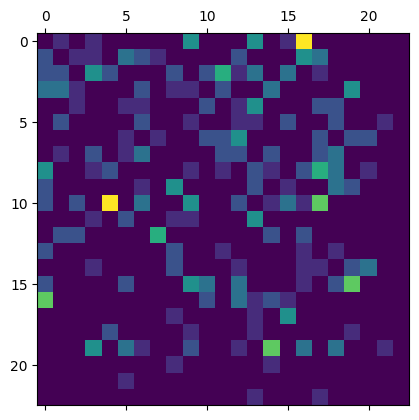

In [26]:
df=pd.read_csv("data.csv")
plot_data=df[["id","home_goals","away_goals","home_team","away_team"]]
teams_goals={}
for index, row in plot_data.iterrows():
    if teams_id[row["home_team"]] not in teams_goals:
        teams_goals[teams_id[row["home_team"]]]={}
    if teams_id[row["away_team"]] not in teams_goals:
        teams_goals[teams_id[row["away_team"]]]={}
    home_goals=row["home_goals"]
    away_goals=row["away_goals"]
    if teams_goals[teams_id[row["home_team"]]].get(teams_id[row["away_team"]]) is None:
        teams_goals[teams_id[row["home_team"]]][teams_id[row["away_team"]]]=home_goals
    else:
        teams_goals[teams_id[row["home_team"]]][teams_id[row["away_team"]]]+=home_goals
    if teams_goals[teams_id[row["away_team"]]].get(teams_id[row["home_team"]]) is None:
        teams_goals[teams_id[row["away_team"]]][teams_id[row["home_team"]]]=away_goals
    else:
        teams_goals[teams_id[row["away_team"]]][teams_id[row["home_team"]]]+=away_goals

#plot_data new imae for each team

#plot the matrix ogngoals of each team against each other in the same league
#teams_goals


import numpy as np
import matplotlib.pyplot as plt
#plot a matrix for first league
matrix=np.zeros((len(leagues_teams[384]),len(leagues_teams[384])))
for i in range(len(leagues_teams[384])):
    for j in range(len(leagues_teams[384])):
        if i!=j and teams_goals[leagues_teams[384][i]].get(leagues_teams[384][j]) is not None:
            matrix[i][j]=teams_goals[leagues_teams[384][i]][leagues_teams[384][j]]
        else:
            matrix[i][j]=0
plt.matshow(matrix)
plt.show()


    


In [43]:
##Load data and split it into training and testing sets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data=pd.read_csv("data.csv")
data=data[["home_team","away_team","home_goals","away_goals","home_team_players_id","away_team_players_id"]]
X=[]
Y=[]
for index, row in data.iterrows():
    row_data=[]
    row_data.append(row["home_team"])
    row_data.append(row["away_team"])
    for player in eval(row["home_team_players_id"])+eval(row["away_team_players_id"]):
        row_data.append(player)
    if len(row_data)<=30:
        for i in range(30-len(row_data)):
            row_data.append(0)
    row_data=np.array(row_data,dtype=int)
    X.append(row_data)
    Y.append([int(row["home_goals"]),int(row["away_goals"])])



X=np.array(X)
Y=np.array(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X.shape,Y.shape


((650, 30), (650, 2))

In [47]:
print(Y_train)

<class 'numpy.ndarray'>


In [100]:
## Neural Network Model
import torch
import torch.nn as nn
# Data size:
# Input: 30
# Output: regresion 2
# Hidden layer: 5
# Activation function: ReLU
# Loss function: MSE
# Optimizer: SGD


class my_model(nn.Module):
    def __init__(self):
        super(my_model, self).__init__()
        self.fc1 = nn.Linear(30, 5)
        self.fc2 = nn.Linear(5, 2)
        self.relu = nn.ReLU()
        self.relu2 = nn.ReLU()
    def activation(self,x):
        return self.relu(x)
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        return x
    def custom_loss(self,output,output_pred):
        loss=0
        for i in range(len(output)):
            loss+=torch.abs(output_pred[i][0]-output[i][0])+torch.abs(output_pred[i][1]-output[i][1])
            #print(output_pred[i],output[i])
            if output_pred[i][0]==0 and output[i][0]!=0:
                loss+=10
            if output_pred[i][1]==0 and output[i][1]!=0:
                loss+=10
        return loss/len(output)
    def train(self,input,output,epochs):
        criterion = self.custom_loss
        optimizer = torch.optim.Adam(self.parameters(), lr=0.0001)
        for epoch in range(epochs):
            optimizer.zero_grad()
            output_pred = self.forward(input)
            #print(output_pred)
            loss = criterion(output, output_pred)
            loss.backward()
            optimizer.step()
            if epoch%10==0:
                print("epoch: ",epoch," loss: ",loss.item())
        for i in range(len(output_pred)):
            print(output_pred[i],output[i])


my_model=my_model()
my_model.train(torch.from_numpy(X_train).float(),torch.from_numpy(Y_train).float(),1000)


epoch:  0  loss:  3250604.0
epoch:  10  loss:  3144842.25
epoch:  20  loss:  3041533.75
epoch:  30  loss:  2941974.75
epoch:  40  loss:  2845155.25
epoch:  50  loss:  2750987.25
epoch:  60  loss:  2660257.0
epoch:  70  loss:  2571612.25
epoch:  80  loss:  2485569.5
epoch:  90  loss:  2402277.75
epoch:  100  loss:  2321701.25
epoch:  110  loss:  2243993.25
epoch:  120  loss:  2167975.75
epoch:  130  loss:  2093778.0
epoch:  140  loss:  2022353.75
epoch:  150  loss:  1952842.5
epoch:  160  loss:  1885717.375
epoch:  170  loss:  1821915.0
epoch:  180  loss:  1760202.375
epoch:  190  loss:  1699810.375
epoch:  200  loss:  1641533.0
epoch:  210  loss:  1585542.875
epoch:  220  loss:  1530967.375
epoch:  230  loss:  1477736.75
epoch:  240  loss:  1426090.125
epoch:  250  loss:  1376341.125
epoch:  260  loss:  1329084.625
epoch:  270  loss:  1283134.125
epoch:  280  loss:  1238293.375
epoch:  290  loss:  1194099.75
epoch:  300  loss:  1150474.625
epoch:  310  loss:  1107851.5
epoch:  320  los